# Effective pandas exercises

## 2.5 Exercises:
1. Install pandas on your machine (using Anaconda or pip).
2. Install Jupyter on your machine.
3. Launch Jupyter and run the following in a cell:
    - import pandas
    - pandas.show_versions ()

In [249]:
# ! pip install pandas


In [250]:
import pandas as pd

In [251]:
print(pd.__version__)

1.5.3


In [252]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.12.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.15.120+
Version          : #1 SMP Wed Aug 30 11:19:59 UTC 2023
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : en_US.UTF-8
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.23.5
pytz             : 2023.3.post1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.1.2
Cython           : 3.0.5
pytest           : 7.4.3
hypothesis       : None
sphinx           : 5.0.2
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.3
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.9
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli  

## 3.2 Exercises:
1. If you had a spreadsheet with data, which pandas data structure would you use to hold the data? Why?
    - DataFrame, becasue it has similar dimensions to hold the data.

2. If you had a database with data, which pandas data structure would you use to hold the data? Why?
    - DataFrame after reading a query from a data base to hold the tabular data.

In [253]:
series = {
    'index':[0 , 1 , 2 , 3] ,
    'data':[145 , 142 , 38 , 13] ,
    'name': 'songs'  }

In [254]:
def get ( series , idx ):
    value_idx = series ['index']. index ( idx )
    return series ['data'][ value_idx ]

get(series,1)

142

In [255]:
songs = {
    'index':[ 'Paul' , 'John' , 'George' , 'Ringo'],
    'data':[145 , 142 , 38 , 13] ,
    'name': 'counts'
    }

get ( songs , 'John')


142

In [256]:
songs2 = pd.Series([145, 142, 38, 13], name='counts')

In [257]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

In [258]:
songs3 = pd.Series(
    [145, 142, 38, 13],
    name='counts',
    index=['Paul', 'Jhon', 'George', 'Ringo']
)

songs3.index

Index(['Paul', 'Jhon', 'George', 'Ringo'], dtype='object')

In [259]:
class Foo:
    pass

In [260]:
ringo = pd.Series(
    [ 'Richard', 'Starkey', 13, Foo()],
    name='ringo'
)

ringo

0                                    Richard
1                                    Starkey
2                                         13
3    <__main__.Foo object at 0x7dc23cb210c0>
Name: ringo, dtype: object

In [261]:
import numpy as np

In [262]:
nan_series2 = pd.Series(
    [2, np.nan],
    index=['Ono', 'Clapton'],
    dtype='Int64'
)

nan_series2

Ono           2
Clapton    <NA>
dtype: Int64

In [263]:
nan_series2.count()

1

In [264]:
#nan_series.astype('Int64')

In [265]:
numpy_ser = np.array([145, 142, 38, 13])
numpy_ser.mean()

84.5

In [266]:
songs3.mean()

84.5

In [267]:
mask = songs3 > songs3.median()
mask
songs3[mask]

Paul    145
Jhon    142
Name: counts, dtype: int64

In [268]:
numpy_ser[numpy_ser > np.median(numpy_ser)]

array([145, 142])

In [269]:
s = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype='category')
s

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [270]:
s.cat.ordered

False

In [271]:
s2 = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype='category')
size_type = pd.api.types.CategoricalDtype(
    categories=['s', 'm', 'l'], ordered=True
)
s3 = s2.astype(size_type)

In [272]:
s3 > 's'

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [273]:
s.cat.reorder_categories(['xs', 's', 'm', 'l', 'xl'], ordered=True)

0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [274]:
s3.str.upper()

0      M
1      L
2    NaN
3      S
4    NaN
dtype: object

## 4.8 Exercises
1. Create a series with the temperature values for the last seven days. Filter out the values below the mean.

2. Create a series with your favorite colors. Use a categorical type.


In [275]:
temperature = pd.Series([24.10, 24.9, 21.8, 24.9, 24.10, 25.11, 24.12])
temperature

0    24.10
1    24.90
2    21.80
3    24.90
4    24.10
5    25.11
6    24.12
dtype: float64

In [276]:
mask = temperature > temperature.mean()
mask
temperature[mask]

1    24.90
3    24.90
5    25.11
dtype: float64

In [277]:
colors = pd.Series(['blue', 'white', 'orange', 'yellow', 'red', 'green'], dtype='category')
colors

0      blue
1     white
2    orange
3    yellow
4       red
5     green
dtype: category
Categories (6, object): ['blue', 'green', 'orange', 'red', 'white', 'yellow']

## Chapter 5

In [278]:
url = '/content/drive/MyDrive/Colab Notebooks/vehicles.csv.zip'
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08

<ipython-input-278-8dd7b9e69228>:2: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [279]:
len(dir(city_mpg))

420

In [280]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
46834    26
46835    28
46836    24
46837    24
46838    21
Name: highway08, Length: 46839, dtype: int64

## 5.4 Exercises
1. Explore the documentation for five attributes of a series from Jupyter.
2. How many attributes are found on the .str attribute? Look at the documentation for three of them.
3. How many attributes are found on the .dt attribute? Look at the documentation for three of them.

In [281]:
dir(city_mpg)[:20]


['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__']

In [282]:
s_str = pd.Series(['a','b','c'])

n_attributes = len(dir(s_str.str))

print('There are {} attributes foiund on the .str attribute'.format(n_attributes))

There are 99 attributes foiund on the .str attribute


In [283]:
s_ts = pd.to_datetime(pd.Series(['2022-01-01','2022-01-02','2022-01-03']))

n_attributes = len(dir(s_ts.dt))

print('There are {} attributes foiund on the .dt attribute'.format(n_attributes))

There are 83 attributes foiund on the .dt attribute


In [284]:
#The index of a Series is used to label and identify each element of the underlying data.
#The index can be thought of as an immutable ordered set (technically a multi-set, as
# it may contain duplicate labels), and is used to index and align data in pandas.
city_mpg.index

RangeIndex(start=0, stop=46839, step=1)

In [285]:
# An ExtensionArray of the values stored within. For extension types,
# this is the actual array. For NumPy native types,
# this is a thin (no copy) wrapper around numpy.ndarray.
#.array differs .values which may require converting the data to a different form.
city_mpg.array

<PandasArray>
[19,  9, 23, 10, 17, 21, 22, 23, 23, 23,
 ...
 18, 23, 21, 24, 21, 19, 20, 18, 18, 16]
Length: 46839, dtype: int64

In [286]:
# Return Series as ndarray or ndarray-like depending on the dtype.
city_mpg.values

array([19,  9, 23, ..., 18, 18, 16])

In [287]:
# Return a Series/DataFrame with absolute numeric value of each element.
# This function only applies to elements that are all numeric.
city_mpg.abs

<bound method NDFrame.abs of 0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: int64>

In [288]:
# Return the dtype object of the underlying data.
city_mpg.dtype

dtype('int64')

## Chapter 6

In [289]:
(city_mpg + highway_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
46834    22.5
46835    24.0
46836    21.0
46837    21.0
46838    18.5
Length: 46839, dtype: float64

In [290]:
s1 = pd.Series([10, 20, 30], index=[1,2,2])
s2 = pd.Series([35, 44, 53], index=[2,2,4], name='s2')

In [291]:
s1

1    10
2    20
2    30
dtype: int64

In [292]:
s2

2    35
2    44
4    53
Name: s2, dtype: int64

In [293]:
s1.add(s2, fill_value=0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

In [294]:
((city_mpg +highway_mpg)/2)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
46834    22.5
46835    24.0
46836    21.0
46837    21.0
46838    18.5
Length: 46839, dtype: float64

In [295]:
(city_mpg.add(highway_mpg).div(2))

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
46834    22.5
46835    24.0
46836    21.0
46837    21.0
46838    18.5
Length: 46839, dtype: float64

## 6.9 Exercises With a dataset of your choice:
1. Add a numeric series to itself.
2. Add 10 to a numeric series.
3. Add a numeric series to itself using the .add method.
4. Read the documentation for the .add method.

In [296]:
s1 + s1

1    20
2    40
2    60
dtype: int64

In [297]:
s1 + 10

1    20
2    30
2    40
dtype: int64

In [298]:
s1.add(s1)

1    20
2    40
2    60
dtype: int64

## Chapter 7

In [299]:
city_mpg.quantile([.1, .5, .9])

0.1    13.0
0.5    18.0
0.9    25.0
Name: city08, dtype: float64

In [300]:
(city_mpg.gt(20).sum())

13013

In [301]:
(city_mpg.gt(20).mul(100).mean())

27.78240355259506

In [302]:
city_mpg.agg('mean')

19.35075471295288

In [303]:
def second_to_last(s):
    return s.iloc[-2]

In [304]:
city_mpg.agg(['mean', 'var', 'max', second_to_last])

mean               19.350755
var               121.582272
max               153.000000
second_to_last     18.000000
Name: city08, dtype: float64

## 7.5 Exercises With a dataset of your choice:
1. Find the count of non-missing values of a series.
2. Find the number of entries of a series.
3. Find the number of unique entries of a series.
4. Find the mean value of a series.
5. Find the maximum value of a series.
6. Use the .agg method to find all of the above.

In [305]:
city_mpg.count()

46839

In [306]:
city_mpg.size

46839

In [307]:
city_mpg.nunique()

134

In [308]:
city_mpg.nunique(dropna=True)

134

In [309]:
city_mpg.mean()

19.35075471295288

In [310]:
city_mpg.max()

153

In [311]:
city_mpg.agg(['count', 'size', 'nunique', 'mean', 'max'])

count      46839.000000
size       46839.000000
nunique      134.000000
mean          19.350755
max          153.000000
Name: city08, dtype: float64

## Chapter 8

In [312]:
city_mpg.convert_dtypes()

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: Int64

In [313]:
city_mpg.astype('Int16')

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: Int16

In [314]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [315]:
city_mpg.nbytes

374712

In [316]:
city_mpg.astype('Int16').nbytes

140517

In [317]:
make = df.make
make.nbytes

374712

In [318]:
make.memory_usage()

374840

In [319]:
make.memory_usage(deep=True)

2966807

In [320]:
make.astype('category').memory_usage(deep=True)

107720

In [321]:
city_mpg.astype('category')

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: category
Categories (134, int64): [6, 7, 8, 9, ..., 148, 150, 151, 153]

In [322]:
values = pd.Series(sorted(set(city_mpg)))
city_type = pd.CategoricalDtype(categories=values, ordered=True)
city_mpg.astype(city_type)

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: category
Categories (134, int64): [6 < 7 < 8 < 9 ... 148 < 150 < 151 < 153]

In [323]:
city_mpg.to_frame()

,city08
0,19
1,9
2,23
3,10
4,17
...,...
46834,19
46835,20
46836,18
46837,18


## 8.7 Exercises With a dataset of your choice:
1. Convert a numeric column to a smaller type.
2. Calculate the memory savings by converting to smaller numeric types.
3. Convert a string column into a categorical type.
4. Calculate the memory savings by converting to a categorical type.

In [324]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
46834    26
46835    28
46836    24
46837    24
46838    21
Name: highway08, Length: 46839, dtype: int64

In [325]:
highway_mpg.nbytes

374712

In [326]:
highway_mpg.astype('Int16').nbytes

140517

In [327]:
createdOn = df.createdOn
createdOn.nbytes

374712

In [328]:
createdOn.astype('category').nbytes

97262

## Chapter 9 Manipulation Methods

In [329]:
def gt20(val):
    return val > 20

In [330]:
%%timeit
city_mpg.apply(gt20)

8.64 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [331]:
%%timeit
city_mpg.gt(20)

128 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [332]:
make = df.make
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

In [333]:
make.value_counts()

Chevrolet                        4388
Ford                             3765
GMC                              2760
Dodge                            2682
BMW                              2424
                                 ... 
Volga Associated Automobile         1
Panos                               1
Panoz Auto-Development              1
London Taxi                         1
Import Foreign Auto Sales Inc       1
Name: make, Length: 143, dtype: int64

In [334]:
top5 = make.value_counts().index[:5]
def generalize_top5(val):
    if val in top5:
        return val
    return 'Other'

In [335]:
%%timeit
make.apply(generalize_top5)

46.5 ms ± 888 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [336]:
#%%timeit
make.where(make.isin(top5), other='Other')

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
46834    Other
46835    Other
46836    Other
46837    Other
46838    Other
Name: make, Length: 46839, dtype: object

In [337]:
make.mask(~make.isin(top5), other='Other')

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
46834    Other
46835    Other
46836    Other
46837    Other
46838    Other
Name: make, Length: 46839, dtype: object

In [338]:
vc = make.value_counts()
top5 = vc.index[:5]
top10 = vc.index[:10]
def generalize(val):
    if val in top5:
        return val
    elif val in top10:
        return 'Top10'
    else:
        return 'Other'

In [339]:
make.apply(generalize)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
46834    Other
46835    Other
46836    Other
46837    Other
46838    Other
Name: make, Length: 46839, dtype: object

In [340]:
(make
 .where(make.isin(top5), 'Top10')
 .where(make.isin(top10), 'Other')
 )

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
46834    Other
46835    Other
46836    Other
46837    Other
46838    Other
Name: make, Length: 46839, dtype: object

In [341]:
pd.Series(np.select([make.isin(top5), make.isin(top10)],
    [make, 'top10'], 'Other'), index=make.index)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
46834    Other
46835    Other
46836    Other
46837    Other
46838    Other
Length: 46839, dtype: object

In [342]:
cyl = df.cylinders
(cyl.isna().sum())

603

In [343]:
missing = cyl.isna()
make.loc[missing]

7138      Nissan
7139      Toyota
8143      Toyota
8144        Ford
8146        Ford
          ...   
40674     Rivian
40675     Rivian
40676     Rivian
40677    Vinfast
40678    Vinfast
Name: make, Length: 603, dtype: object

In [344]:
cyl[cyl.isna()]

7138    NaN
7139    NaN
8143    NaN
8144    NaN
8146    NaN
         ..
40674   NaN
40675   NaN
40676   NaN
40677   NaN
40678   NaN
Name: cylinders, Length: 603, dtype: float64

In [345]:
cyl.fillna(0).loc[7136:7141]

7136    6.0
7137    6.0
7138    0.0
7139    0.0
7140    6.0
7141    6.0
Name: cylinders, dtype: float64

In [346]:
temp = pd.Series([32, 40, None, 42, 39, 32])
temp

0    32.0
1    40.0
2     NaN
3    42.0
4    39.0
5    32.0
dtype: float64

In [347]:
temp.interpolate()

0    32.0
1    40.0
2    41.0
3    42.0
4    39.0
5    32.0
dtype: float64

In [348]:
city_mpg.loc[:446]

0      19
1       9
2      23
3      10
4      17
       ..
442    15
443    15
444    15
445    15
446    31
Name: city08, Length: 447, dtype: int64

In [349]:
(
    city_mpg
    .loc[:446]
    .clip(lower=city_mpg.quantile(.05),
          upper=city_mpg.quantile(.95))
)

0      19
1      11
2      23
3      11
4      17
       ..
442    15
443    15
444    15
445    15
446    28
Name: city08, Length: 447, dtype: int64

In [350]:
city_mpg.sort_values()

42856      6
41582      6
34522      6
21057      6
7901       6
        ... 
31226    150
40625    151
40256    151
40623    153
40254    153
Name: city08, Length: 46839, dtype: int64

In [351]:
(city_mpg.sort_values() + highway_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
46834    22.5
46835    24.0
46836    21.0
46837    21.0
46838    18.5
Length: 46839, dtype: float64

In [352]:
city_mpg.sort_values().sort_index()

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: int64

In [353]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: int64

In [354]:
city_mpg.drop_duplicates()

0         19
1          9
2         23
3         10
4         17
        ... 
38608     82
39582    111
40254    153
40256    151
40663     65
Name: city08, Length: 134, dtype: int64

In [355]:
city_mpg.rank()

0        29408.5
1          252.0
2        39697.5
3          633.5
4        21051.5
          ...   
46834    29408.5
46835    32478.0
46836    25469.0
46837    25469.0
46838    16677.0
Name: city08, Length: 46839, dtype: float64

In [356]:
city_mpg.rank(method='min')

0        27688.0
1          147.0
2        38829.0
3          358.0
4        18853.0
          ...   
46834    27688.0
46835    31130.0
46836    23251.0
46837    23251.0
46838    14502.0
Name: city08, Length: 46839, dtype: float64

In [357]:
city_mpg.rank(method='dense')

0        14.0
1         4.0
2        18.0
3         5.0
4        12.0
         ... 
46834    14.0
46835    15.0
46836    13.0
46837    13.0
46838    11.0
Name: city08, Length: 46839, dtype: float64

In [358]:
make.replace('Subaru', 'スバル')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4               スバル
            ...    
46834           スバル
46835           スバル
46836           スバル
46837           スバル
46838           スバル
Name: make, Length: 46839, dtype: object

In [359]:
pd.cut(city_mpg, [0, 10, 20, 40, 70, 150])

0        (10, 20]
1         (0, 10]
2        (20, 40]
3         (0, 10]
4        (10, 20]
           ...   
46834    (10, 20]
46835    (10, 20]
46836    (10, 20]
46837    (10, 20]
46838    (10, 20]
Name: city08, Length: 46839, dtype: category
Categories (5, interval[int64, right]): [(0, 10] < (10, 20] < (20, 40] < (40, 70] < (70, 150]]

In [360]:
pd.qcut(city_mpg, 10)

0         (18.0, 19.0]
1        (5.999, 13.0]
2         (22.0, 25.0]
3        (5.999, 13.0]
4         (16.0, 18.0]
             ...      
46834     (18.0, 19.0]
46835     (19.0, 20.0]
46836     (16.0, 18.0]
46837     (16.0, 18.0]
46838     (15.0, 16.0]
Name: city08, Length: 46839, dtype: category
Categories (10, interval[float64, right]): [(5.999, 13.0] < (13.0, 14.0] < (14.0, 15.0] <
                                            (15.0, 16.0] ... (19.0, 20.0] < (20.0, 22.0] <
                                            (22.0, 25.0] < (25.0, 153.0]]

In [361]:
pd.qcut(city_mpg, 10, labels=list(range(1,11)))

0        6
1        1
2        9
3        1
4        5
        ..
46834    6
46835    7
46836    5
46837    5
46838    4
Name: city08, Length: 46839, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

## 9.14 Exercises With a dataset of your choice:

1. Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' if it is below the mean using .apply.

2. Create a series from a numeric column that has the value of 'high' if it is equal to or above the mean and 'low' if it is below the mean using np.select.

3. Time the differences between the previous two solutions to see which is faster.

4. Replace the missing values of a numeric series with the median value.

5. Clip the values of a numeric series to between to 10th and 90th percentiles.

6. Using a categorical column, replace any value that is not in the top 5 most frequent values with 'Other'.

7. Using a categorical column, replace any value that is not in the top 10 most frequent values with 'Other'.

8. Make a function that takes a categorical series and a number (n) and returns a replace series that replaces any value that is not in the top n most frequent values with 'Other'.

9. Using a numeric column, bin it into 10 groups that have the same width.

10. Using a numeric column, bin it into 10 groups that have equal sized bins.

In [362]:
city_mpg.mean()

19.35075471295288

In [363]:
mean = city_mpg.mean()
def high_low(val):
    if val >= mean:
        return 'high'
    return 'low'

In [364]:
%%timeit
city_mpg.apply(high_low)

12.3 ms ± 4.84 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [365]:
%%timeit
pd.Series(np.select([city_mpg.ge(mean), city_mpg.lt(mean)],
    ['high', 'low']), index=city_mpg.index)

3.64 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [366]:
cyl.isna().sum()

603

In [367]:
cyl_mean = cyl.mean()
cyl_fillna = cyl.fillna(cyl_mean)
cyl_fillna.isna().sum()

0

In [368]:
(city_mpg
    .loc[:446]
    .clip(lower=city_mpg.quantile(.10),
          upper=city_mpg.quantile(.90))
)

0      19
1      13
2      23
3      13
4      17
       ..
442    15
443    15
444    15
445    15
446    25
Name: city08, Length: 447, dtype: int64

In [369]:
%whos

Variable          Type                Data/Info
-----------------------------------------------
Foo               type                <class '__main__.Foo'>
age               Series              0     0-10\n1    11-15\n2<...>4    46-50\ndtype: object
alta_df           DataFrame                      STATION       <...>[14160 rows x 22 columns]
between           function            <function between at 0x7dc23bfae950>
city2             Series              Alfa Romeo    19\nFerrari<...>ngth: 46839, dtype: int64
city_mpg          Series              0        19\n1         9\<...>ngth: 46839, dtype: int64
city_type         CategoricalDtype    category
col               Series              0     2015-03-08 08:00:00<...>0:00+00:00\ndtype: object
colors            Series              0      blue\n1     white\<...>'red', 'white', 'yellow']
cost              Series              Gum        1.00\nCookie  <...>s    2.79\ndtype: float64
createdOn         Series              0        Tue Jan 01 00:00

In [370]:
make2 = make.astype('category')

In [371]:
make2.value_counts().index[:10]

CategoricalIndex(['Chevrolet', 'Ford', 'GMC', 'Dodge', 'BMW', 'Toyota',
                  'Mercedes-Benz', 'Nissan', 'Porsche', 'Volkswagen'],
                 categories=['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart'], ordered=False, dtype='category')

In [372]:
m2= make2.value_counts()
top5 = m2.index[:5]
top10 = m2.index[:10]

(make
 .where(make2.isin(top5), 'Top10')
 .where(make2.isin(top10), 'Other')
 )

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
46834    Other
46835    Other
46836    Other
46837    Other
46838    Other
Name: make, Length: 46839, dtype: object

In [373]:
m2 = make2.value_counts()
def generalize2(val, number=50):
    top = m2.index[:number]
    if val in top:
        return val
    return 'Other'

In [374]:
make2.apply(generalize2)

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

In [375]:
highway_mpg

0        25
1        14
2        33
3        12
4        23
         ..
46834    26
46835    28
46836    24
46837    24
46838    21
Name: highway08, Length: 46839, dtype: int64

In [376]:
pd.cut(highway_mpg,10)

0         (22.1, 35.2]
1        (8.869, 22.1]
2         (22.1, 35.2]
3        (8.869, 22.1]
4         (22.1, 35.2]
             ...      
46834     (22.1, 35.2]
46835     (22.1, 35.2]
46836     (22.1, 35.2]
46837     (22.1, 35.2]
46838    (8.869, 22.1]
Name: highway08, Length: 46839, dtype: category
Categories (10, interval[float64, right]): [(8.869, 22.1] < (22.1, 35.2] < (35.2, 48.3] <
                                            (48.3, 61.4] ... (87.6, 100.7] < (100.7, 113.8] <
                                            (113.8, 126.9] < (126.9, 140.0]]

In [377]:
pd.qcut(highway_mpg, 10)

0         (24.0, 26.0]
1        (8.999, 17.0]
2         (29.0, 33.0]
3        (8.999, 17.0]
4         (21.0, 23.0]
             ...      
46834     (24.0, 26.0]
46835     (27.0, 29.0]
46836     (23.0, 24.0]
46837     (23.0, 24.0]
46838     (19.0, 21.0]
Name: highway08, Length: 46839, dtype: category
Categories (10, interval[float64, right]): [(8.999, 17.0] < (17.0, 19.0] < (19.0, 21.0] <
                                            (21.0, 23.0] ... (26.0, 27.0] < (27.0, 29.0] <
                                            (29.0, 33.0] < (33.0, 140.0]]

## Chapter 10 Indexing Operations

In [378]:
city2 = city_mpg.rename((make.to_dict()))
city2

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: city08, Length: 46839, dtype: int64

In [379]:
city2.index

Index(['Alfa Romeo', 'Ferrari', 'Dodge', 'Dodge', 'Subaru', 'Subaru', 'Subaru',
       'Toyota', 'Toyota', 'Toyota',
       ...
       'Saab', 'Saturn', 'Saturn', 'Saturn', 'Saturn', 'Subaru', 'Subaru',
       'Subaru', 'Subaru', 'Subaru'],
      dtype='object', length=46839)

In [380]:
city2.rename('citympg')

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
              ..
Subaru        19
Subaru        20
Subaru        18
Subaru        18
Subaru        16
Name: citympg, Length: 46839, dtype: int64

In [381]:
city2.reset_index()

,index,city08
0,Alfa Romeo,19
1,Ferrari,9
2,Dodge,23
3,Dodge,10
4,Subaru,17
...,...,...
46834,Subaru,19
46835,Subaru,20
46836,Subaru,18
46837,Subaru,18


In [382]:
city2.reset_index(drop=True)

0        19
1         9
2        23
3        10
4        17
         ..
46834    19
46835    20
46836    18
46837    18
46838    16
Name: city08, Length: 46839, dtype: int64

In [383]:
city2.loc['Subaru']

Subaru    17
Subaru    21
Subaru    22
Subaru    19
Subaru    20
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 991, dtype: int64

In [384]:
city2.loc[['Ferrari', 'Lamborghini']]

Ferrari         9
Ferrari        12
Ferrari        11
Ferrari        10
Ferrari        11
               ..
Lamborghini     6
Lamborghini     8
Lamborghini     8
Lamborghini     8
Lamborghini     8
Name: city08, Length: 433, dtype: int64

In [385]:
city2.sort_index().loc['Ferrari':'Lamborghini']

Ferrari        13
Ferrari        10
Ferrari        11
Ferrari        10
Ferrari        16
               ..
Lamborghini     9
Lamborghini     8
Lamborghini     9
Lamborghini    10
Lamborghini     8
Name: city08, Length: 12829, dtype: int64

In [386]:
city2.sort_index ().loc["F":"J"]

Federal Coach    13
Federal Coach    13
Federal Coach    14
Federal Coach    13
Federal Coach    13
                 ..
Isuzu            22
Isuzu            32
Isuzu            19
Isuzu            15
Isuzu            15
Name: city08, Length: 10211, dtype: int64

In [387]:
idx = pd.Index(['Dodge'])
city2.loc[idx]

Dodge    23
Dodge    10
Dodge    12
Dodge    11
Dodge    11
         ..
Dodge    18
Dodge    17
Dodge    14
Dodge    14
Dodge    11
Name: city08, Length: 2682, dtype: int64

In [388]:
mask = city2 > 50
mask

Alfa Romeo    False
Ferrari       False
Dodge         False
Dodge         False
Subaru        False
              ...  
Subaru        False
Subaru        False
Subaru        False
Subaru        False
Subaru        False
Name: city08, Length: 46839, dtype: bool

In [389]:
city2.loc[mask]

Nissan    81
Toyota    81
Toyota    81
Ford      74
Nissan    84
          ..
Honda     51
Toyota    53
Toyota    57
Toyota    53
Toyota    52
Name: city08, Length: 689, dtype: int64

In [390]:
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79],
    index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
inflation = 1.10
(cost
    .mul(inflation)
    .loc[lambda s_: s_ > 3]
)

Melon      4.389
Carrots    3.069
dtype: float64

In [391]:
cost = pd.Series([1.00, 2.25, 3.99, .99, 2.79],
    index=['Gum', 'Cookie', 'Melon', 'Roll', 'Carrots'])
inflation = 1.10
mask = cost > 3
(cost
    .mul(inflation)
    .loc[mask]
)

Melon    4.389
dtype: float64

In [392]:
city2.iloc[0]

19

In [393]:
city2.iloc[-1]

16

In [394]:
city2.iloc[[0,1,-1]]

Alfa Romeo    19
Ferrari        9
Subaru        16
Name: city08, dtype: int64

In [395]:
city2.iloc[0:5]

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64

In [396]:
city2.head(5)

Alfa Romeo    19
Ferrari        9
Dodge         23
Dodge         10
Subaru        17
Name: city08, dtype: int64

In [397]:
city2.iloc[-8:]

Saturn    21
Saturn    24
Saturn    21
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64

In [398]:
mask = city2 > 50
city2.iloc[mask.to_numpy()]

Nissan    81
Toyota    81
Toyota    81
Ford      74
Nissan    84
          ..
Honda     51
Toyota    53
Toyota    57
Toyota    53
Toyota    52
Name: city08, Length: 689, dtype: int64

In [399]:
city2.iloc[list(mask)]

Nissan    81
Toyota    81
Toyota    81
Ford      74
Nissan    84
          ..
Honda     51
Toyota    53
Toyota    57
Toyota    53
Toyota    52
Name: city08, Length: 689, dtype: int64

In [400]:
city2.head(3)

Alfa Romeo    19
Ferrari        9
Dodge         23
Name: city08, dtype: int64

In [401]:
city2.tail(3)

Subaru    18
Subaru    18
Subaru    16
Name: city08, dtype: int64

In [402]:
city2.sample(6, random_state=42)

Mercury      18
Saturn       24
Chevrolet    22
Porsche      20
Buick        15
Buick        17
Name: city08, dtype: int64

In [403]:
city2.filter(regex='(Ford)|(Subaru)')

Subaru    17
Subaru    21
Subaru    22
Ford      18
Ford      16
          ..
Subaru    19
Subaru    20
Subaru    18
Subaru    18
Subaru    16
Name: city08, Length: 4756, dtype: int64

In [404]:
city_mpg.reindex([0, 0, 10, 20, 2_000_000])

0          19.0
0          19.0
10         23.0
20         14.0
2000000     NaN
Name: city08, dtype: float64

## 10.10 Exercises With a dataset of your choice:
1. Inspect the index.
2. Sort the index.
3. Set the index to monotonically increasing integers starting from 0.
4. Set the index to monotonically increasing integers starting from 0, then convert these to the string version. Save this a s2.
5. Using s2, pull out the first 5 entries.
6. Using s2, pull out the last 5 entries.
7. Using s2, pull out one hundred entries starting at index position 10.
8. Using s2, create a series with values with index entries '20', '10', and '2'.

In [405]:
%whos

Variable          Type                Data/Info
-----------------------------------------------
Foo               type                <class '__main__.Foo'>
age               Series              0     0-10\n1    11-15\n2<...>4    46-50\ndtype: object
alta_df           DataFrame                      STATION       <...>[14160 rows x 22 columns]
between           function            <function between at 0x7dc23bfae950>
city2             Series              Alfa Romeo    19\nFerrari<...>ngth: 46839, dtype: int64
city_mpg          Series              0        19\n1         9\<...>ngth: 46839, dtype: int64
city_type         CategoricalDtype    category
col               Series              0     2015-03-08 08:00:00<...>0:00+00:00\ndtype: object
colors            Series              0      blue\n1     white\<...>'red', 'white', 'yellow']
cost              Series              Gum        1.00\nCookie  <...>s    2.79\ndtype: float64
createdOn         Series              0        Tue Jan 01 00:00

In [406]:
m2.index

CategoricalIndex(['Chevrolet', 'Ford', 'GMC', 'Dodge', 'BMW', 'Toyota',
                  'Mercedes-Benz', 'Nissan', 'Porsche', 'Volkswagen',
                  ...
                  'London Taxi', 'Shelby', 'Lambda Control Systems',
                  'Import Foreign Auto Sales Inc', 'London Coach Co Inc',
                  'Qvale', 'STI', 'S and S Coach Company  E.p. Dutton',
                  'General Motors', 'JBA Motorcars, Inc.'],
                 categories=['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo', 'Wallace Environmental', 'Yugo', 'smart'], ordered=False, dtype='category', length=143)

In [407]:
m2.sort_index()

AM General                        6
ASC Incorporated                  1
Acura                           407
Alfa Romeo                       94
American Motors Corporation      27
                               ... 
Volkswagen                     1306
Volvo                           911
Wallace Environmental            32
Yugo                              8
smart                            38
Name: make, Length: 143, dtype: int64

In [408]:
s2 = m2.reset_index()
s2

,index,make
0,Chevrolet,4388
1,Ford,3765
2,GMC,2760
3,Dodge,2682
4,BMW,2424
...,...,...
138,Qvale,1
139,STI,1
140,S and S Coach Company E.p. Dutton,1
141,General Motors,1


In [409]:
s2 = s2.index.astype('string')

In [410]:
s2

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '133', '134', '135', '136', '137', '138', '139', '140', '141', '142'],
      dtype='string', length=143)

In [411]:
s2[0:5]

Index(['0', '1', '2', '3', '4'], dtype='string')

In [412]:
s2[-5:]

Index(['138', '139', '140', '141', '142'], dtype='string')

In [413]:
s2[10:110]

Index(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57',
       '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104',
       '105', '106', '107', '108', '109'],
      dtype='string')

In [414]:
s3 = pd.Series([s2[20], s2[10], s2[2]])


In [415]:
s3.values

array(['20', '10', '2'], dtype=object)

## Chapter 11 String Manipulation

In [416]:
make

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

In [417]:
make.astype('string')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: string

In [418]:
make.astype('category')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: category
Categories (143, object): ['AM General', 'ASC Incorporated', 'Acura', 'Alfa Romeo', ..., 'Volvo',
                           'Wallace Environmental', 'Yugo', 'smart']

In [419]:
'Ford'.lower()
make.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
46834        subaru
46835        subaru
46836        subaru
46837        subaru
46838        subaru
Name: make, Length: 46839, dtype: object

In [420]:
'Alfa Romeo'.find('A')
make.str.find('A')

0        0
1       -1
2       -1
3       -1
4       -1
        ..
46834   -1
46835   -1
46836   -1
46837   -1
46838   -1
Name: make, Length: 46839, dtype: int64

In [421]:
(make
 .str.extract(r'([^a-z A-Z])', expand=False)
 .value_counts()
)

-    2083
.      46
,       9
Name: make, dtype: int64

In [422]:
age = pd.Series(['0-10', '11-15', '11-15', '61-65', '46-50',])
age

0     0-10
1    11-15
2    11-15
3    61-65
4    46-50
dtype: object

In [423]:
age.str.split('-')

0     [0, 10]
1    [11, 15]
2    [11, 15]
3    [61, 65]
4    [46, 50]
dtype: object

In [424]:
(age
 .str.split('-', expand=True)
 .iloc[:,0]
 .astype(int)
)

0     0
1    11
2    11
3    61
4    46
Name: 0, dtype: int64

In [425]:
(age
    .str.slice(-2)
    .astype(int)
)

0    10
1    15
2    15
3    65
4    50
dtype: int64

In [426]:
(age
    .str[-2:]
    .astype(int)
)

0    10
1    15
2    15
3    65
4    50
dtype: int64

In [427]:
(age
 .str.split('-', expand=True)
 .astype(int)
 .mean(axis='columns')
)

0     5.0
1    13.0
2    13.0
3    63.0
4    48.0
dtype: float64

In [428]:
import random
def between(row):
    return random.randint(*row.values)

In [429]:
(age
 .str.split('-', expand=True)
 .astype(int)
 .apply(between, axis='columns')
)

0     3
1    15
2    11
3    61
4    49
dtype: int64

In [430]:
make.str.replace('A', 'Å')

0        Ålfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

In [431]:
make.replace('A', 'Å')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

In [432]:
make.replace({'Audi': 'Åudi', 'Acura': 'Åcura',
              'Ashton Martin': 'Åshton Martin',
              'Alfa Romeo': 'Ålfa Romeo'})


0        Ålfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

In [433]:
make.replace('A', 'Å', regex=True)

0        Ålfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: object

## 11.9 Exercises With a dataset of your choice:
1. Using a string column, lowercase the values.
2. Using a string column, slice out the first character.
3. Using a string column, slice out the last three characters.
4. Using a string column, create a series extracting the numeric values.
5. Using a string column, create a series extracting the non-ASCII values.
6. Using a string column, create a dataframe with the dummy columns for every character in the column.

In [434]:
s = make.astype('string')
s

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4            Subaru
            ...    
46834        Subaru
46835        Subaru
46836        Subaru
46837        Subaru
46838        Subaru
Name: make, Length: 46839, dtype: string

In [435]:
s.str.lower()

0        alfa romeo
1           ferrari
2             dodge
3             dodge
4            subaru
            ...    
46834        subaru
46835        subaru
46836        subaru
46837        subaru
46838        subaru
Name: make, Length: 46839, dtype: string

In [436]:
s.str.slice(1)

0        lfa Romeo
1           errari
2             odge
3             odge
4            ubaru
           ...    
46834        ubaru
46835        ubaru
46836        ubaru
46837        ubaru
46838        ubaru
Name: make, Length: 46839, dtype: string

In [437]:
s.str.slice(-3)

0        meo
1        ari
2        dge
3        dge
4        aru
        ... 
46834    aru
46835    aru
46836    aru
46837    aru
46838    aru
Name: make, Length: 46839, dtype: string

In [438]:
random_numbers = [random.randint(0,100) for x in range(20)]

In [439]:
s2 = pd.Series(random_numbers)
s2 = s2.astype('string')
s2

0     25
1     42
2     70
3     75
4     99
5      2
6     15
7     84
8     96
9     83
10    35
11     5
12    29
13     2
14    59
15    38
16    72
17    77
18    95
19    17
dtype: string

In [440]:
(s2
    .str[:]
    .astype(int)
)

0     25
1     42
2     70
3     75
4     99
5      2
6     15
7     84
8     96
9     83
10    35
11     5
12    29
13     2
14    59
15    38
16    72
17    77
18    95
19    17
dtype: int64

In [441]:
none_ascii = make.str.replace('A', 'Å')

In [442]:
none_ascii =  none_ascii.astype('string')

In [443]:
none_ascii.str.extract(r'([^\x00-\x7F]+)', expand=False)

0           Å
1        <NA>
2        <NA>
3        <NA>
4        <NA>
         ... 
46834    <NA>
46835    <NA>
46836    <NA>
46837    <NA>
46838    <NA>
Name: make, Length: 46839, dtype: string

In [444]:
none_ascii.str.get_dummies(sep="")

,,",",-,.,B,C,D,E,F,G,...,r,s,t,u,v,w,x,y,z,Å
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46834,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
46835,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
46836,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
46837,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


## Chapter 12 Date and Time Manipulation

In [445]:
col = pd.Series(['2015-03-08 08:00:00+00:00',
    '2015-03-08 08:30:00+00:00',
    '2015-03-08 09:00:00+00:00',
    '2015-03-08 09:30:00+00:00',
    '2015-11-01 06:30:00+00:00',
    '2015-11-01 07:00:00+00:00',
    '2015-11-01 07:30:00+00:00',
    '2015-11-01 08:00:00+00:00',
    '2015-11-01 08:30:00+00:00',
    '2015-11-01 08:00:00+00:00',
    '2015-11-01 08:30:00+00:00',
    '2015-11-01 09:00:00+00:00',
    '2015-11-01 09:30:00+00:00',
    '2015-11-01 10:00:00+00:00',
])

In [446]:
utc_s = pd.to_datetime(col, utc=True)
utc_s

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-11-01 06:30:00+00:00
5    2015-11-01 07:00:00+00:00
6    2015-11-01 07:30:00+00:00
7    2015-11-01 08:00:00+00:00
8    2015-11-01 08:30:00+00:00
9    2015-11-01 08:00:00+00:00
10   2015-11-01 08:30:00+00:00
11   2015-11-01 09:00:00+00:00
12   2015-11-01 09:30:00+00:00
13   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

In [447]:
utc_s.dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-11-01 00:30:00-06:00
5    2015-11-01 01:00:00-06:00
6    2015-11-01 01:30:00-06:00
7    2015-11-01 01:00:00-07:00
8    2015-11-01 01:30:00-07:00
9    2015-11-01 01:00:00-07:00
10   2015-11-01 01:30:00-07:00
11   2015-11-01 02:00:00-07:00
12   2015-11-01 02:30:00-07:00
13   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [448]:
s = pd.Series(['2015-03-08 08:00:00-00:00',
    '2015-03-08 08:30:00-00:00',
    '2015-03-08 09:00:00-00:00',
    '2015-03-08 09:30:00-00:00',
    '2015-11-01 06:30:00-00:00',
    '2015-11-01 07:00:00-00:00',
    '2015-11-01 07:30:00-00:00',
    '2015-11-01 08:00:00-00:00',
    '2015-11-01 08:30:00-00:00',
    '2015-11-01 08:00:00-00:00',
    '2015-11-01 08:30:00-00:00',
    '2015-11-01 09:00:00-00:00',
    '2015-11-01 09:30:00-00:00',
    '2015-11-01 10:00:00-00:00',
])

In [449]:
pd.to_datetime(s, utc=True).dt.tz_convert('America/Denver')

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-11-01 00:30:00-06:00
5    2015-11-01 01:00:00-06:00
6    2015-11-01 01:30:00-06:00
7    2015-11-01 01:00:00-07:00
8    2015-11-01 01:30:00-07:00
9    2015-11-01 01:00:00-07:00
10   2015-11-01 01:30:00-07:00
11   2015-11-01 02:00:00-07:00
12   2015-11-01 02:30:00-07:00
13   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [450]:
time = pd.Series(['2015-03-08 01:00:00',
    '2015-03-08 01:30:00',
    '2015-03-08 02:00:00',
    '2015-03-08 02:30:00',
    '2015-03-08 03:00:00',
    '2015-03-08 02:00:00',
    '2015-03-08 02:30:00',
    '2015-03-08 03:00:00',
    '2015-03-08 03:30:00',
    '2015-11-01 00:30:00',
    '2015-11-01 01:00:00',
    '2015-11-01 01:30:00',
    '2015-11-01 02:00:00',
    '2015-11-01 02:30:00',
    '2015-11-01 01:00:00',
    '2015-11-01 01:30:00',
    '2015-11-01 02:00:00',
    '2015-11-01 02:30:00',
    '2015-11-01 03:00:00'
])

In [451]:
offset = pd.Series([-7, -7, -7, -7, -7, -6, -6,
    -6, -6, -6, -6, -6, -6, -6, -7, -7, -7, -7, -7])

In [452]:
(pd.to_datetime(time)
    .groupby(offset)
    .transform(lambda s: s.dt.tz_localize(s.name)
                          .dt.tz_convert('America/Denver'))
)

0    2015-03-07 18:00:07-07:00
1    2015-03-07 18:30:07-07:00
2    2015-03-07 19:00:07-07:00
3    2015-03-07 19:30:07-07:00
4    2015-03-07 20:00:07-07:00
5    2015-03-07 19:00:06-07:00
6    2015-03-07 19:30:06-07:00
7    2015-03-07 20:00:06-07:00
8    2015-03-07 20:30:06-07:00
9    2015-10-31 18:30:06-06:00
10   2015-10-31 19:00:06-06:00
11   2015-10-31 19:30:06-06:00
12   2015-10-31 20:00:06-06:00
13   2015-10-31 20:30:06-06:00
14   2015-10-31 19:00:07-06:00
15   2015-10-31 19:30:07-06:00
16   2015-10-31 20:00:07-06:00
17   2015-10-31 20:30:07-06:00
18   2015-10-31 21:00:07-06:00
dtype: datetime64[ns, America/Denver]

In [453]:
offset = offset.replace({-7:'-07:00', -6:'-06:00'})
local = (pd.to_datetime(time)
    .groupby(offset)
    .transform(lambda s: s.dt.tz_localize(s.name)
                          .dt.tz_convert('America/Denver'))
)

In [454]:
local

0    2015-03-08 01:00:00-07:00
1    2015-03-08 01:30:00-07:00
2    2015-03-08 03:00:00-06:00
3    2015-03-08 03:30:00-06:00
4    2015-03-08 04:00:00-06:00
5    2015-03-08 01:00:00-07:00
6    2015-03-08 01:30:00-07:00
7    2015-03-08 03:00:00-06:00
8    2015-03-08 03:30:00-06:00
9    2015-11-01 00:30:00-06:00
10   2015-11-01 01:00:00-06:00
11   2015-11-01 01:30:00-06:00
12   2015-11-01 01:00:00-07:00
13   2015-11-01 01:30:00-07:00
14   2015-11-01 01:00:00-07:00
15   2015-11-01 01:30:00-07:00
16   2015-11-01 02:00:00-07:00
17   2015-11-01 02:30:00-07:00
18   2015-11-01 03:00:00-07:00
dtype: datetime64[ns, America/Denver]

In [455]:
local.dt.tz_convert('UTC')

0    2015-03-08 08:00:00+00:00
1    2015-03-08 08:30:00+00:00
2    2015-03-08 09:00:00+00:00
3    2015-03-08 09:30:00+00:00
4    2015-03-08 10:00:00+00:00
5    2015-03-08 08:00:00+00:00
6    2015-03-08 08:30:00+00:00
7    2015-03-08 09:00:00+00:00
8    2015-03-08 09:30:00+00:00
9    2015-11-01 06:30:00+00:00
10   2015-11-01 07:00:00+00:00
11   2015-11-01 07:30:00+00:00
12   2015-11-01 08:00:00+00:00
13   2015-11-01 08:30:00+00:00
14   2015-11-01 08:00:00+00:00
15   2015-11-01 08:30:00+00:00
16   2015-11-01 09:00:00+00:00
17   2015-11-01 09:30:00+00:00
18   2015-11-01 10:00:00+00:00
dtype: datetime64[ns, UTC]

In [456]:
url = 'https://github.com/mattharrison/datasets'+\
'/raw/master/data/alta-noaa-1980-2019.csv'

In [457]:
alta_df = pd.read_csv(url)

In [458]:
dates = pd.to_datetime(alta_df.DATE)
dates

0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14155   2019-09-03
14156   2019-09-04
14157   2019-09-05
14158   2019-09-06
14159   2019-09-07
Name: DATE, Length: 14160, dtype: datetime64[ns]

In [461]:
#dates.dt.day_name('es_ES.iso88591')

Error: ignored

In [462]:
dates.dt.is_month_end

0        False
1        False
2        False
3        False
4        False
         ...  
14155    False
14156    False
14157    False
14158    False
14159    False
Name: DATE, Length: 14160, dtype: bool

In [463]:
dates.dt.strftime('%d/%m/%y')

0        01/01/80
1        02/01/80
2        03/01/80
3        04/01/80
4        05/01/80
           ...   
14155    03/09/19
14156    04/09/19
14157    05/09/19
14158    06/09/19
14159    07/09/19
Name: DATE, Length: 14160, dtype: object

## 12.8 Exercises With a dataset of your choice:
1. Convert a column with date information to a date.
2. Convert a date column into UTC dates.
3. Convert a date column into local dates with a timezone.
4. Convert a date column into epoch values.
5. Convert an epoch number into UTC.

In [464]:
dates = pd.to_datetime(alta_df.DATE)
dates

0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14155   2019-09-03
14156   2019-09-04
14157   2019-09-05
14158   2019-09-06
14159   2019-09-07
Name: DATE, Length: 14160, dtype: datetime64[ns]

In [465]:
dates_utc = pd.to_datetime(alta_df.DATE, utc=True)
dates_utc

0       1980-01-01 00:00:00+00:00
1       1980-01-02 00:00:00+00:00
2       1980-01-03 00:00:00+00:00
3       1980-01-04 00:00:00+00:00
4       1980-01-05 00:00:00+00:00
                   ...           
14155   2019-09-03 00:00:00+00:00
14156   2019-09-04 00:00:00+00:00
14157   2019-09-05 00:00:00+00:00
14158   2019-09-06 00:00:00+00:00
14159   2019-09-07 00:00:00+00:00
Name: DATE, Length: 14160, dtype: datetime64[ns, UTC]

In [466]:
dates_utc.dt.tz_convert('America/Denver')

0       1979-12-31 17:00:00-07:00
1       1980-01-01 17:00:00-07:00
2       1980-01-02 17:00:00-07:00
3       1980-01-03 17:00:00-07:00
4       1980-01-04 17:00:00-07:00
                   ...           
14155   2019-09-02 18:00:00-06:00
14156   2019-09-03 18:00:00-06:00
14157   2019-09-04 18:00:00-06:00
14158   2019-09-05 18:00:00-06:00
14159   2019-09-06 18:00:00-06:00
Name: DATE, Length: 14160, dtype: datetime64[ns, America/Denver]

## Chapter 13 Dates in the Index

In [467]:
snow = (alta_df.SNOW.rename(dates))
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [468]:
snow[snow.isna()]

1985-07-30   NaN
1985-09-12   NaN
1985-09-19   NaN
1986-02-07   NaN
1986-06-26   NaN
              ..
2017-04-26   NaN
2017-09-20   NaN
2017-10-02   NaN
2017-12-23   NaN
2018-12-03   NaN
Name: SNOW, Length: 365, dtype: float64

In [469]:
snow.loc['1985-09': '1985-09-20']

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    NaN
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    NaN
1985-09-20    0.0
Name: SNOW, dtype: float64

In [470]:
(snow
 .loc['1985-09': '1985-09-20']
 .fillna(0)
)

1985-09-01    0.0
1985-09-02    0.0
1985-09-03    0.0
1985-09-04    0.0
1985-09-05    0.0
1985-09-06    0.0
1985-09-07    0.0
1985-09-08    0.0
1985-09-09    0.0
1985-09-10    0.0
1985-09-11    0.0
1985-09-12    0.0
1985-09-13    0.0
1985-09-14    0.0
1985-09-15    0.0
1985-09-16    0.0
1985-09-17    0.0
1985-09-18    0.0
1985-09-19    0.0
1985-09-20    0.0
Name: SNOW, dtype: float64

In [471]:
snow.loc['1987-12-30': '1988-01-10']

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    NaN
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    NaN
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [472]:
(snow
 .loc['1987-12-30': '1988-01-10']
 .ffill()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [473]:
(snow
 .loc['1987-12-30': '1988-01-10']
 .bfill()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    0.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    2.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [474]:
(snow
 .loc['1987-12-30': '1988-01-10']
 .interpolate()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-01    2.5
1988-01-02    0.0
1988-01-03    0.0
1988-01-04    1.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [475]:
winter = (snow.index.quarter == 1) | (snow.index.quarter == 4)
(snow
    .where(~(winter & snow.isna()), snow.interpolate())
    .where(~(~winter & snow.isna()), 0)
)

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [476]:
(snow
    .where(~(winter & snow.isna()), snow.interpolate())
    .where(~(~winter & snow.isna()), 0)
    .loc[['1985-09-19', '1988-01-01']]
)

1985-09-19    0.0
1988-01-01    2.5
Name: SNOW, dtype: float64

In [477]:
(snow
 .loc['1987-12-30': '1988-01-10']
 .dropna()
)

1987-12-30    6.0
1987-12-31    5.0
1988-01-02    0.0
1988-01-03    0.0
1988-01-05    2.0
1988-01-06    6.0
1988-01-07    4.0
1988-01-08    9.0
1988-01-09    5.0
1988-01-10    2.0
Name: SNOW, dtype: float64

In [478]:
snow.shift(1)

1980-01-01    NaN
1980-01-02    2.0
1980-01-03    3.0
1980-01-04    1.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [479]:
snow.shift(-1)

1980-01-01    3.0
1980-01-02    1.0
1980-01-03    0.0
1980-01-04    0.0
1980-01-05    1.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    NaN
Name: SNOW, Length: 14160, dtype: float64

In [480]:
(snow
 .add(snow.shift(1))
 .add(snow.shift(2))
 .add(snow.shift(3))
 .add(snow.shift(4))
 .add(snow.shift(5))
 .div(5)
)

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    NaN
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [481]:
(snow.rolling(5).mean())

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    1.2
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [482]:
(snow
    .resample('M')
    .max()
)

1980-01-31    20.0
1980-02-29    25.0
1980-03-31    16.0
1980-04-30    10.0
1980-05-31     9.0
              ... 
2019-05-31     5.1
2019-06-30     0.0
2019-07-31     0.0
2019-08-31     0.0
2019-09-30     0.0
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [483]:
(snow
    .resample('2M')
    .max()
)

1980-01-31    20.0
1980-03-31    25.0
1980-05-31    10.0
1980-07-31     1.0
1980-09-30     0.0
              ... 
2019-01-31    19.0
2019-03-31    20.7
2019-05-31    18.0
2019-07-31     0.0
2019-09-30     0.0
Freq: 2M, Name: SNOW, Length: 239, dtype: float64

In [484]:
(snow
    .resample('A-MAY')
    .max()
)

1980-05-31    25.0
1981-05-31    26.0
1982-05-31    34.0
1983-05-31    38.0
1984-05-31    25.0
1985-05-31    22.0
1986-05-31    34.0
1987-05-31    16.0
1988-05-31    23.0
1989-05-31    30.0
1990-05-31    32.0
1991-05-31    28.0
1992-05-31    22.0
1993-05-31    30.0
1994-05-31    36.0
1995-05-31    25.0
1996-05-31    34.0
1997-05-31    22.0
1998-05-31    29.0
1999-05-31    26.0
2000-05-31    23.0
2001-05-31    19.0
2002-05-31    28.0
2003-05-31    14.0
2004-05-31    24.0
2005-05-31    31.0
2006-05-31    27.0
2007-05-31    15.0
2008-05-31    21.0
2009-05-31    23.0
2010-05-31    32.0
2011-05-31    22.0
2012-05-31    18.0
2013-05-31    19.0
2014-05-31    11.0
2015-05-31    25.0
2016-05-31    15.0
2017-05-31    26.0
2018-05-31    21.8
2019-05-31    20.7
2020-05-31     0.0
Freq: A-MAY, Name: SNOW, dtype: float64

In [485]:
(snow
    .div(snow
            .resample('Q')
            .transform('sum'))
    .mul(100)
    .fillna(0)
)

1980-01-01    0.527009
1980-01-02    0.790514
1980-01-03    0.263505
1980-01-04    0.000000
1980-01-05    0.000000
                ...   
2019-09-03    0.000000
2019-09-04    0.000000
2019-09-05    0.000000
2019-09-06    0.000000
2019-09-07    0.000000
Name: SNOW, Length: 14160, dtype: float64

In [486]:
season2017 = snow.loc['2016-10': '2017-05']
(season2017
    .resample('M')
    .sum()
    .div(season2017
            .sum())
    .mul(100)
)

2016-10-31     2.153969
2016-11-30     9.772637
2016-12-31    15.715995
2017-01-31    25.468688
2017-02-28    21.041085
2017-03-31     9.274033
2017-04-30    14.738732
2017-05-31     1.834862
Freq: M, Name: SNOW, dtype: float64

In [487]:
(snow
    .resample('A-SEP')
    .sum()
)

1980-09-30    457.5
1981-09-30    503.0
1982-09-30    842.5
1983-09-30    807.5
1984-09-30    816.0
1985-09-30    536.0
1986-09-30    740.8
1987-09-30    243.1
1988-09-30    314.5
1989-09-30    429.5
1990-09-30    331.5
1991-09-30    504.7
1992-09-30    340.8
1993-09-30    683.5
1994-09-30    321.0
1995-09-30    645.0
1996-09-30    525.5
1997-09-30    563.6
1998-09-30    579.6
1999-09-30    435.7
2000-09-30    453.0
2001-09-30    468.0
2002-09-30    457.8
2003-09-30    365.4
2004-09-30    514.0
2005-09-30    472.0
2006-09-30    594.6
2007-09-30    319.7
2008-09-30    606.0
2009-09-30    476.8
2010-09-30    391.0
2011-09-30    533.8
2012-09-30    293.5
2013-09-30    362.8
2014-09-30    358.7
2015-09-30    284.3
2016-09-30    354.6
2017-09-30    524.0
2018-09-30    308.8
2019-09-30    504.5
Freq: A-SEP, Name: SNOW, dtype: float64

In [488]:
(snow
    .loc['2016-10': '2017-09']
    .cumsum()
)

2016-10-01      0.0
2016-10-02      0.0
2016-10-03      4.9
2016-10-04      4.9
2016-10-05      5.5
              ...  
2017-09-26    524.0
2017-09-27    524.0
2017-09-28    524.0
2017-09-29    524.0
2017-09-30    524.0
Name: SNOW, Length: 364, dtype: float64

In [489]:
(snow
    .resample('A-SEP')
    .transform('cumsum')
)

1980-01-01      2.0
1980-01-02      5.0
1980-01-03      6.0
1980-01-04      6.0
1980-01-05      6.0
              ...  
2019-09-03    504.5
2019-09-04    504.5
2019-09-05    504.5
2019-09-06    504.5
2019-09-07    504.5
Name: SNOW, Length: 14160, dtype: float64

## 13.12 Exercises With a dataset of your choice:
1. Convert a column with date information to a date.
2. Put the date information into the index for a numeric column.
3. Calculate the average value of the column for each month.
4. Calculate the average value of the column for every 2 months.
5. Calculate the percentage of the column out of the total for each month.
6. Calculate the average value of the column for a rolling window of size 7.
7. Using .loc pull out the first 3 months of a year.
8. Using .loc pull out the last 4 months of a year.

In [490]:
alta_df.DATE

0        1980-01-01
1        1980-01-02
2        1980-01-03
3        1980-01-04
4        1980-01-05
            ...    
14155    2019-09-03
14156    2019-09-04
14157    2019-09-05
14158    2019-09-06
14159    2019-09-07
Name: DATE, Length: 14160, dtype: object

In [491]:
dates = pd.to_datetime(alta_df.DATE)

In [492]:
dates

0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14155   2019-09-03
14156   2019-09-04
14157   2019-09-05
14158   2019-09-06
14159   2019-09-07
Name: DATE, Length: 14160, dtype: datetime64[ns]

In [493]:
alta_df.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype='object')

In [494]:
snow = (alta_df.SNOW.rename(dates))
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [495]:
(snow
    .resample('M')
    .mean()
)

1980-01-31    4.645161
1980-02-29    3.879310
1980-03-31    3.967742
1980-04-30    1.000000
1980-05-31    1.516129
                ...   
2019-05-31    0.838710
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [496]:
(snow
    .resample('2M')
    .mean()
)

1980-01-31    4.645161
1980-03-31    3.925000
1980-05-31    1.262295
1980-07-31    0.016393
1980-09-30    0.000000
                ...   
2019-01-31    2.459016
2019-03-31    3.459322
2019-05-31    1.342623
2019-07-31    0.000000
2019-09-30    0.000000
Freq: 2M, Name: SNOW, Length: 239, dtype: float64

In [497]:
(snow
    .resample('M')
    .sum()
    .div(snow.sum())
    .mul(100)
)

1980-01-31    0.747485
1980-02-29    0.583973
1980-03-31    0.638477
1980-04-30    0.155726
1980-05-31    0.243971
                ...   
2019-05-31    0.134963
2019-06-30    0.000000
2019-07-31    0.000000
2019-08-31    0.000000
2019-09-30    0.000000
Freq: M, Name: SNOW, Length: 477, dtype: float64

In [498]:
(snow
    .rolling(7)
    .mean()
)

1980-01-01    NaN
1980-01-02    NaN
1980-01-03    NaN
1980-01-04    NaN
1980-01-05    NaN
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

In [499]:
snow.loc['2019-01':'2019-03']

2019-01-01     0.0
2019-01-02     0.0
2019-01-03     0.0
2019-01-04     0.0
2019-01-05     0.0
              ... 
2019-03-27     0.0
2019-03-28     0.0
2019-03-29    20.7
2019-03-30     0.7
2019-03-31     0.0
Name: SNOW, Length: 90, dtype: float64

In [500]:
snow.loc['2018-08':'2018-12']

2018-08-01    0.0
2018-08-02    0.0
2018-08-03    0.0
2018-08-04    0.0
2018-08-05    0.0
             ... 
2018-12-27    3.0
2018-12-28    0.5
2018-12-29    0.3
2018-12-30    6.4
2018-12-31    6.8
Name: SNOW, Length: 153, dtype: float64

## Chapter 14 Plotting with a Series

In [501]:
%matplotlib inline

In [502]:
url = 'https://github.com/mattharrison/datasets'+\
'/raw/master/data/alta-noaa-1980-2019.csv'
alta_df =  pd.read_csv(url)
dates = pd.to_datetime(alta_df.DATE)
snow = (alta_df
    .SNOW
    .rename(dates)
)

In [503]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

<Axes: ylabel='Frequency'>

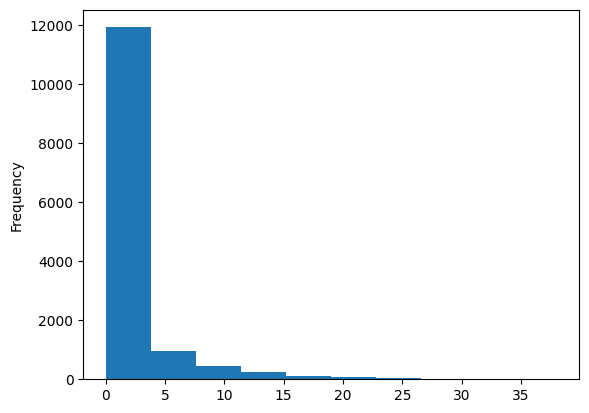

In [504]:
snow.plot.hist()

<Axes: title={'center': 'Snowfall Histogram (in)'}, ylabel='Frequency'>

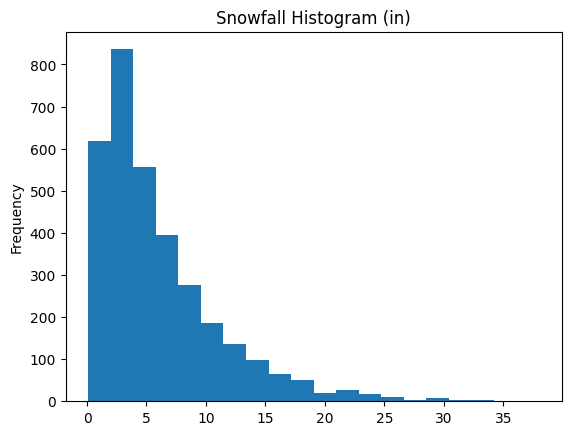

In [506]:
snow[snow>0].plot.hist(bins=20, title='Snowfall Histogram (in)')

<Axes: >

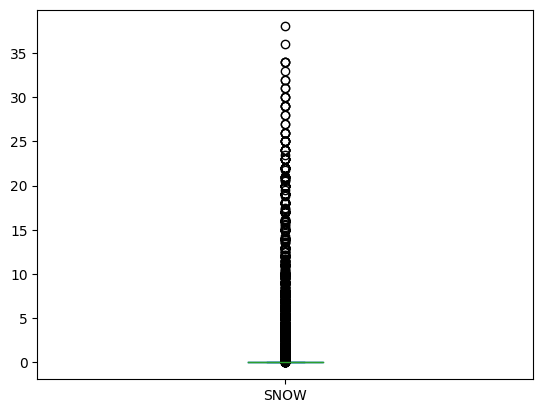

In [507]:
snow.plot.box()

<Axes: >

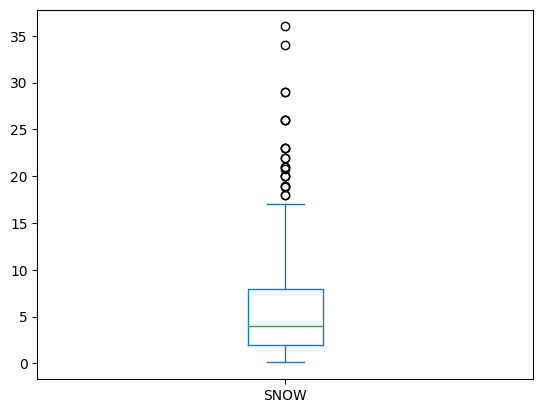

In [509]:
(snow
  [lambda s:(s.index.month == 1) & (s>0)]
  .plot.box()
)

<Axes: ylabel='Density'>

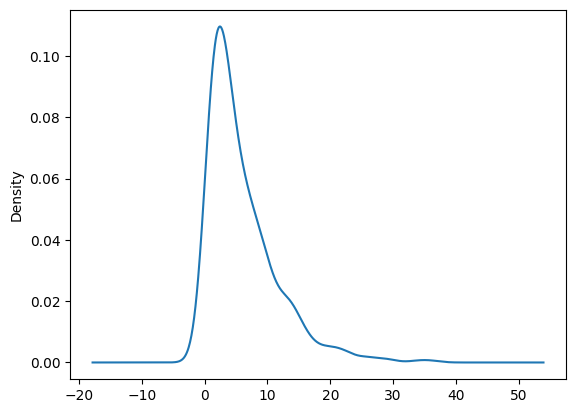

In [510]:
(snow
    [lambda s:(s.index.month == 1) & (s>0)]
    .plot.kde()
)

<Axes: >

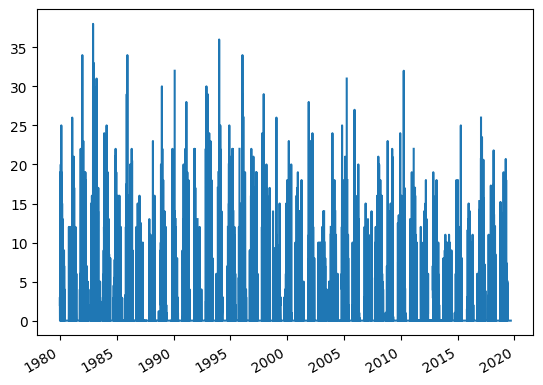

In [511]:
snow.plot.line()

<Axes: >

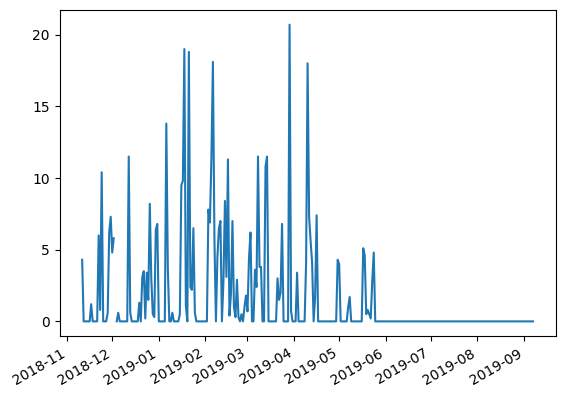

In [515]:
(snow
  .iloc[-300:]
  .plot.line()
)

<Axes: >

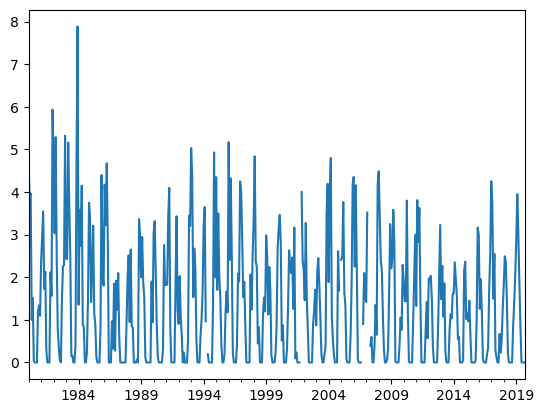

In [516]:
(snow
  .resample('M')
  .mean()
  .plot.line()
)

<Axes: >

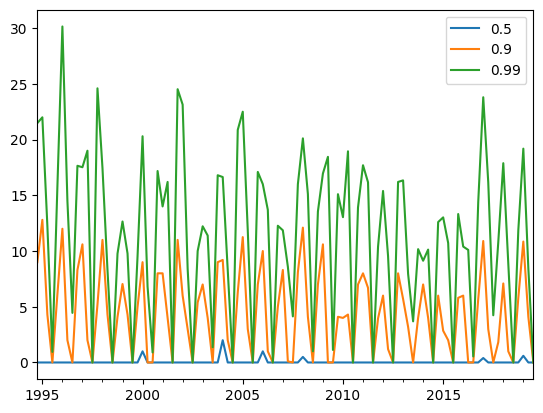

In [517]:
(snow
  .resample('Q')
  .quantile([.5, .9, .99])
  .unstack()
  .iloc[-100:]
 .plot.line()
)

In [518]:
season2017 = (snow.loc['2016-10': '2017-05'])
(season2017.resample('M')
  .sum()
  .div(season2017.sum())
  .mul(100)
  .rename(lambda idx: idx.month_name())
)

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

<Axes: title={'center': '2017 Montyhly Precent of Snowfall'}>

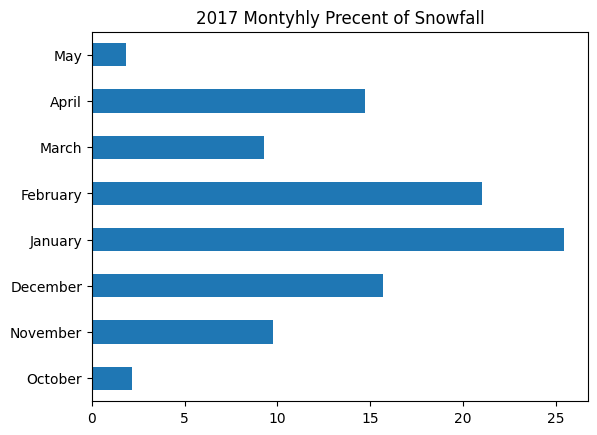

In [527]:
season2017 = (snow.loc['2016-10': '2017-05'])
(season2017.resample('M')
  .sum()
  .div(season2017.sum())
  .mul(100)
  .rename(lambda idx: idx.month_name())
  .plot.barh(title='2017 Montyhly Precent of Snowfall')
)

In [521]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/'+\
      'vehicles.csv.zip'
df =pd.read_csv(url)


<ipython-input-521-52a821461138>:3: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv(url)


In [522]:
make = df.make

In [523]:
make.value_counts()

Chevrolet                      4003
Ford                           3371
Dodge                          2583
GMC                            2494
Toyota                         2071
                               ... 
Volga Associated Automobile       1
Panos                             1
Mahindra                          1
Excalibur Autos                   1
London Coach Co Inc               1
Name: make, Length: 136, dtype: int64

<Axes: >

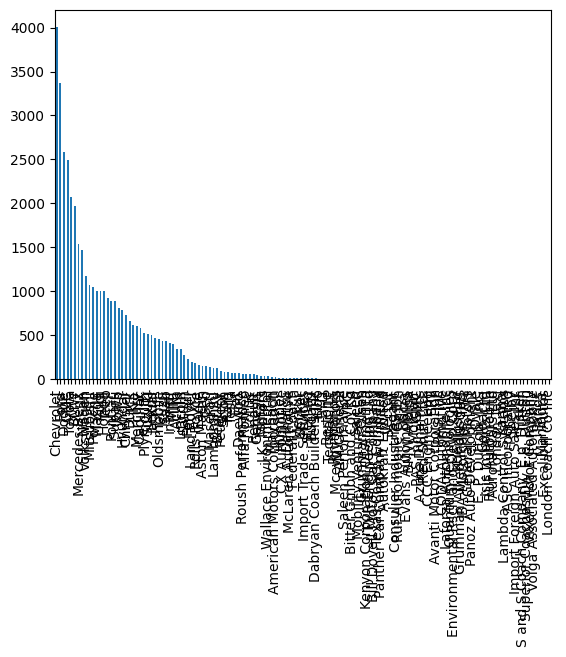

In [525]:
(make
 .value_counts()
 .plot.bar()
)

<Axes: >

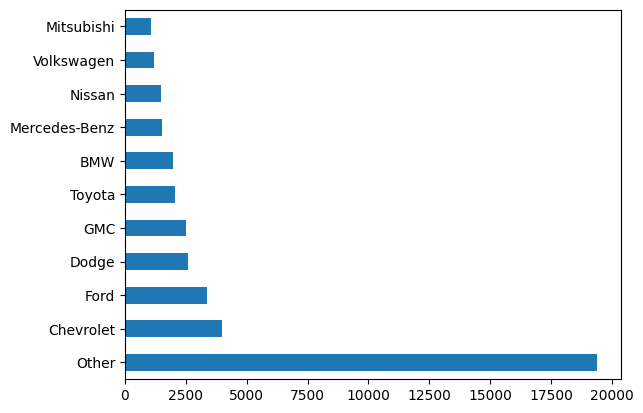

In [528]:
top10 = make.value_counts().index[:10]
(make
 .where(make.isin(top10), 'Other')
 .value_counts()
 .plot.barh()
)

<Axes: title={'center': '2017 Montyhly Precent of Snowfall'}, ylabel='SNOW'>

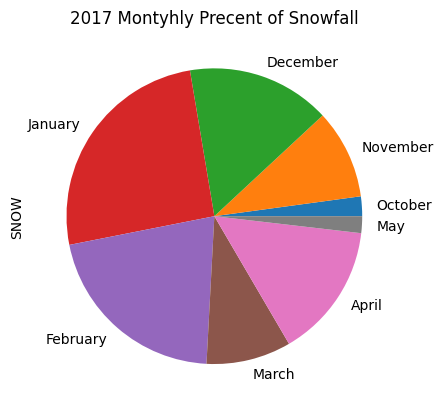

In [530]:
(season2017.resample('M')
  .sum()
  .div(season2017.sum())
  .mul(100)
  .rename(lambda idx: idx.month_name())
  .plot.pie(title='2017 Montyhly Precent of Snowfall')
)

##14.12 Exercises With a dataset of your choice:
1. Create a histogram from a numeric column. Change the bin size.
2. Create a boxplot from a numeric column.
3. Create a Kernel Density Estimate plot from a numeric column.
4. Create a line from a numeric column.
5. Create a bar plot from a frequency count of a categorical column.
6. Create a pie plot from a frequency count of a categorical column.

In [533]:
alta_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [546]:
snwd = (alta_df.SNWD)

<Axes: ylabel='Frequency'>

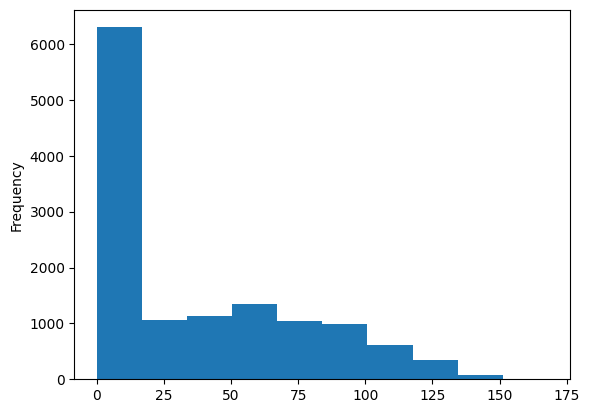

In [547]:
snwd.plot.hist()

<Axes: title={'center': 'Latitudes Histogram (in)'}, ylabel='Frequency'>

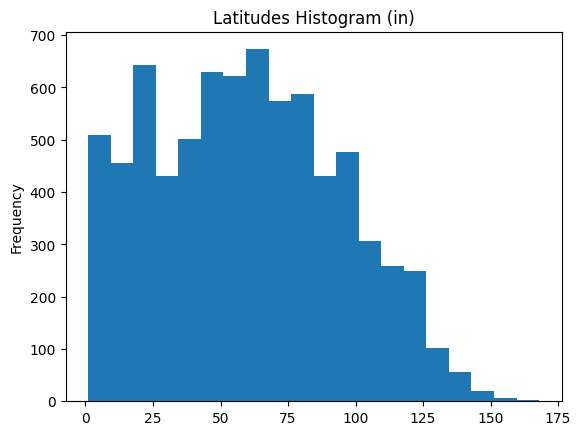

In [549]:
snwd[snwd>0].plot.hist(bins=20, title='Latitudes Histogram (in)')

<Axes: >

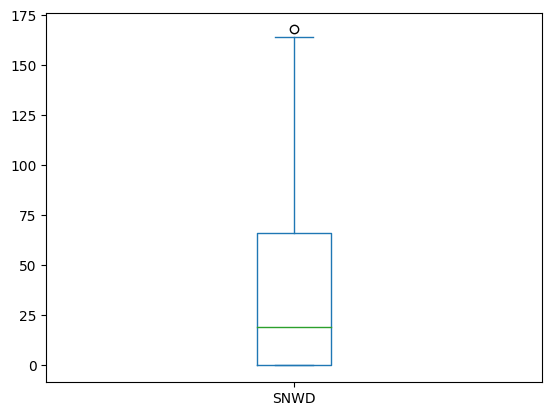

In [550]:
snwd.plot.box()

<Axes: >

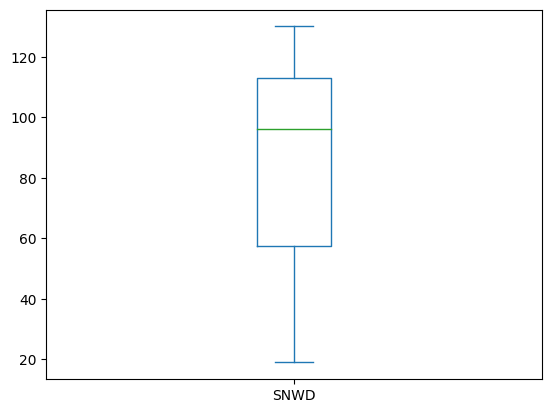

In [551]:
(snwd
  .quantile([.5, .9, .99])
  .iloc[-100:]
 .plot.box()
)

<Axes: ylabel='Density'>

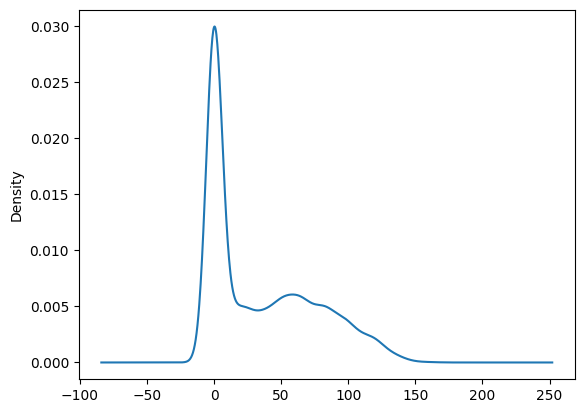

In [552]:
snwd.plot.kde()

<Axes: >

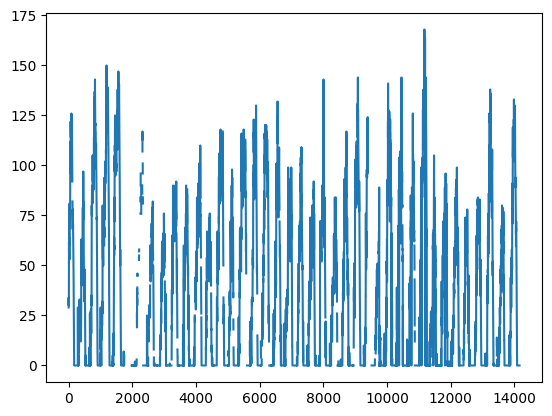

In [554]:
snwd.plot.line()

<Axes: >

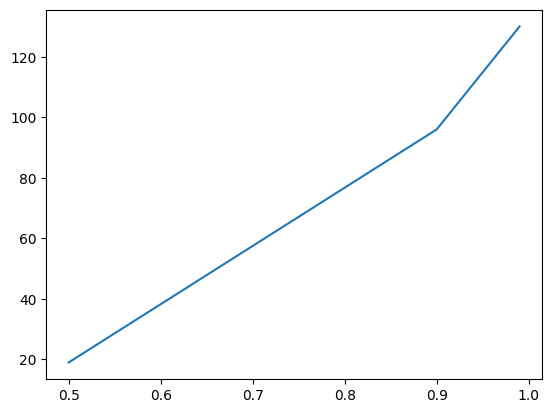

In [558]:
(snwd
  .quantile([.5, .9, .99])
  .iloc[-100:]
  .plot.line()
)

<Axes: >

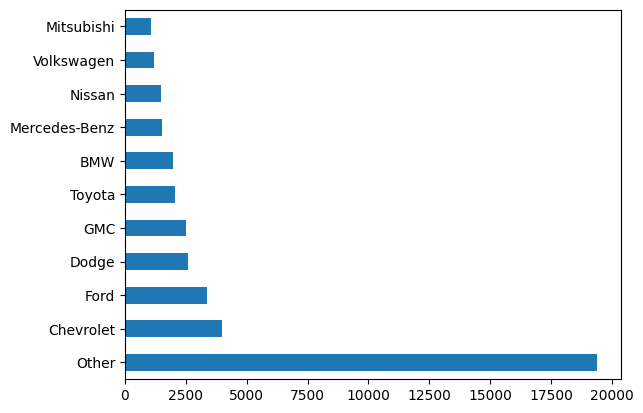

In [565]:
top10 = make.value_counts().index[:10]
(make
 .where(make.isin(top10), 'Other')
 .value_counts()
 .plot.barh()
)

<Axes: title={'center': '2017 Montyhly Precent of Snowfall'}, ylabel='SNOW'>

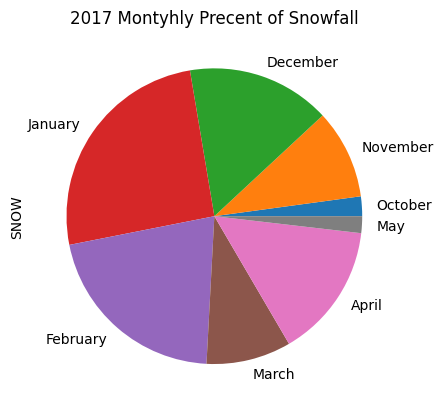

In [ ]:
(season2017.resample('M')
  .sum()
  .div(season2017.sum())
  .mul(100)
  .rename(lambda idx: idx.month_name())
  .plot.pie(title='2017 Montyhly Precent of Snowfall')
)